In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#iris 데이터셋 로드와 Dict 포맷의 키 확인하기
data = load_iris()
print("iris dataset format and keys\n",data.keys())

iris dataset format and keys
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
#feature name과 관측값 가져오기
iris_data = data['data']
iris_cols = data['feature_names']
print("iris dataset columns\n",iris_cols)

iris dataset columns
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
#column name을 재설정
iris_cols=['sep_len', 'sep_wt', 'pet_len', 'pet_wt']

In [4]:
#데이터프레임 생성
iris_df = pd.DataFrame(data= iris_data, columns= iris_cols)
iris_df['target'] = data['target']
print(iris_df.head(5))

   sep_len  sep_wt  pet_len  pet_wt  target
0      5.1     3.5      1.4     0.2       0
1      4.9     3.0      1.4     0.2       0
2      4.7     3.2      1.3     0.2       0
3      4.6     3.1      1.5     0.2       0
4      5.0     3.6      1.4     0.2       0


In [5]:
#품종별 데이터 카운팅 체크
target_cnt_df = iris_df.groupby(by='target').count()
print(target_cnt_df)

        sep_len  sep_wt  pet_len  pet_wt
target                                  
0            50      50       50      50
1            50      50       50      50
2            50      50       50      50


In [6]:
#PCA 수행
#표준화(스케일링)
from sklearn.preprocessing import StandardScaler

X_train = iris_df.iloc[:, :4]
iris_z_score = StandardScaler().fit_transform(X_train) 

iris_z_df = pd.DataFrame(data= iris_z_score, columns= iris_cols)
print(iris_z_df.head(5))

    sep_len    sep_wt   pet_len    pet_wt
0 -0.900681  1.019004 -1.340227 -1.315444
1 -1.143017 -0.131979 -1.340227 -1.315444
2 -1.385353  0.328414 -1.397064 -1.315444
3 -1.506521  0.098217 -1.283389 -1.315444
4 -1.021849  1.249201 -1.340227 -1.315444


In [7]:
#주성분 분석(Feature 4 --> 2 axes)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(iris_z_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
#주성분 찾기 : 고유벡터
print('PCA Shape:\n', pca.components_.shape)
print('PCA eigenvectors:\n',pca.components_)

#고유벡터에 데이터를 투영시키는 과정이 transform이다.
X_pca = pca.transform(iris_z_df)
print('PCA Projection result(shape)\n',X_pca.shape)

PCA Shape:
 (2, 4)
PCA eigenvectors:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
PCA Projection result(shape)
 (150, 2)


In [9]:
#각 주성분이 분산을 얼마나 잘 설명하는지를 나타냄
import numpy as np
print('variance :\n',pca.explained_variance_ratio_)
print('total variance :\n', np.sum(pca.explained_variance_ratio_))
print('\n')

variance :
 [0.72962445 0.22850762]
total variance :
 0.9581320720000165




   pca_com_1  pca_com_2  target
0  -2.264703   0.480027       0
1  -2.080961  -0.674134       0
2  -2.364229  -0.341908       0
3  -2.299384  -0.597395       0
4  -2.389842   0.646835       0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


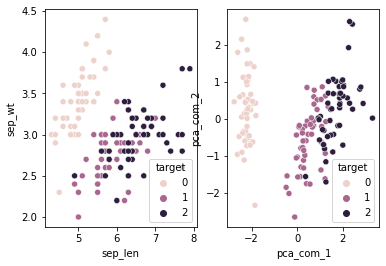

In [10]:
#projection 된 결과를 데이터프레임으로 구성
pca_cols = ['pca_com_1', 'pca_com_2']
pca_df = pd.DataFrame(data= X_pca, columns= pca_cols)
pca_df['target'] = data['target']
print(pca_df.head(5))

#주성분 분석 결과 시각화
fig, ax = plt.subplots(ncols=2)

sns.scatterplot(iris_df['sep_len'], iris_df['sep_wt'], 
                hue=iris_df['target'], ax=ax[0])
sns.scatterplot(pca_df['pca_com_1'], pca_df['pca_com_2'], 
                hue=pca_df['target'], ax=ax[1])
plt.show()
